In [1]:
from scipy import stats
import numpy as np

In [2]:
m1 = np.random.normal(loc=32,scale=0.3,size=2000)
m2 = np.random.normal(loc=33,scale=0.3,size=2000)
# just for heatmap",
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [3]:
#Perform a kernel density estimate on the data

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values) # fit
Z = np.reshape(kernel(positions).T, X.shape) # probabilities for heat map"

In [6]:
prob_array = kernel.evaluate([(32,33,33.5),(33,32,32.5)]) #predict

In [7]:
print (prob_array)

[1.60219912e+00 1.49608307e-10 5.57039342e-14]


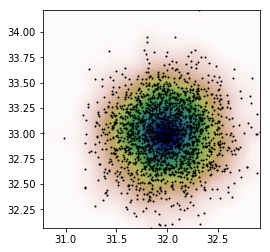

In [8]:
#Plot the results:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()